In [2]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('D:/Education/College/sem 7/Deep Learning/pa'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Education/College/sem 7/Deep Learning/pa\001_01.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_02.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_03.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_04.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_05.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_06.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_07.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_08.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_09.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_10.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_11.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_12.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_13.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_14.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_15.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_16.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_17.jpg
D:/Education/College/sem 7/Deep Learning/pa\001_18.jpg
D:/Educati

In [3]:
from keras.preprocessing import image

In [4]:
train_images = sorted(os.listdir('D:/Education/College/sem 7/Deep Learning/pa'))

In [5]:
train_images

['001_01.jpg',
 '001_02.jpg',
 '001_03.jpg',
 '001_04.jpg',
 '001_05.jpg',
 '001_06.jpg',
 '001_07.jpg',
 '001_08.jpg',
 '001_09.jpg',
 '001_10.jpg',
 '001_11.jpg',
 '001_12.jpg',
 '001_13.jpg',
 '001_14.jpg',
 '001_15.jpg',
 '001_16.jpg',
 '001_17.jpg',
 '001_18.jpg',
 '001_19.jpg',
 '001_20.jpg',
 '001_21.jpg',
 '001_22.jpg',
 '001_23.jpg',
 '001_24.jpg',
 '001_25.jpg',
 '001_26.jpg',
 '004_01.jpg',
 '004_02.jpg',
 '004_03.jpg',
 '004_04.jpg',
 '004_05.jpg',
 '004_06.jpg',
 '004_07.jpg',
 '004_08.jpg',
 '004_09.jpg',
 '004_10.jpg',
 '004_11.jpg',
 '004_12.jpg',
 '005_01.jpg',
 '005_02.jpg',
 '005_03.jpg',
 '005_04.jpg',
 '005_05.jpg',
 '006_01.jpg',
 '006_02.jpg',
 '006_03.jpg',
 '006_04.jpg',
 '006_05.jpg',
 '006_06.jpg',
 '007_01.jpg',
 '007_02.jpg',
 '007_03.jpg',
 '007_04.jpg',
 '007_05.jpg',
 '007_06.jpg',
 '007_07.jpg',
 '007_08.jpg',
 '007_09.jpg',
 '007_10.jpg',
 '008_01.jpg',
 '008_02.jpg',
 '008_03.jpg',
 '008_04.jpg',
 '008_05.jpg',
 '008_06.jpg',
 '008_07.jpg',
 '008_08.j

In [6]:
train_image = []
for im in train_images:
    img = image.load_img('D:/Education/College/sem 7/Deep Learning/pa/'+ im, target_size=(28,28), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)

In [7]:
import matplotlib.pyplot as plt

def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(28,28), cmap='gray')
    plt.show()

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import matplotlib.image as mpimg
from numpy import unique,argmax
from tensorflow.keras import Sequential,layers,Input
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow import keras
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from PIL import Image
%matplotlib inline
from skimage.io import imread, imshow
import random

In [8]:
def add_noise(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.07
    return noisy

In [9]:
noised_df= []

for img in train_df:
    noisy= add_noise(img)
    noised_df.append(noisy)

In [10]:
noised_df= np.array(noised_df)

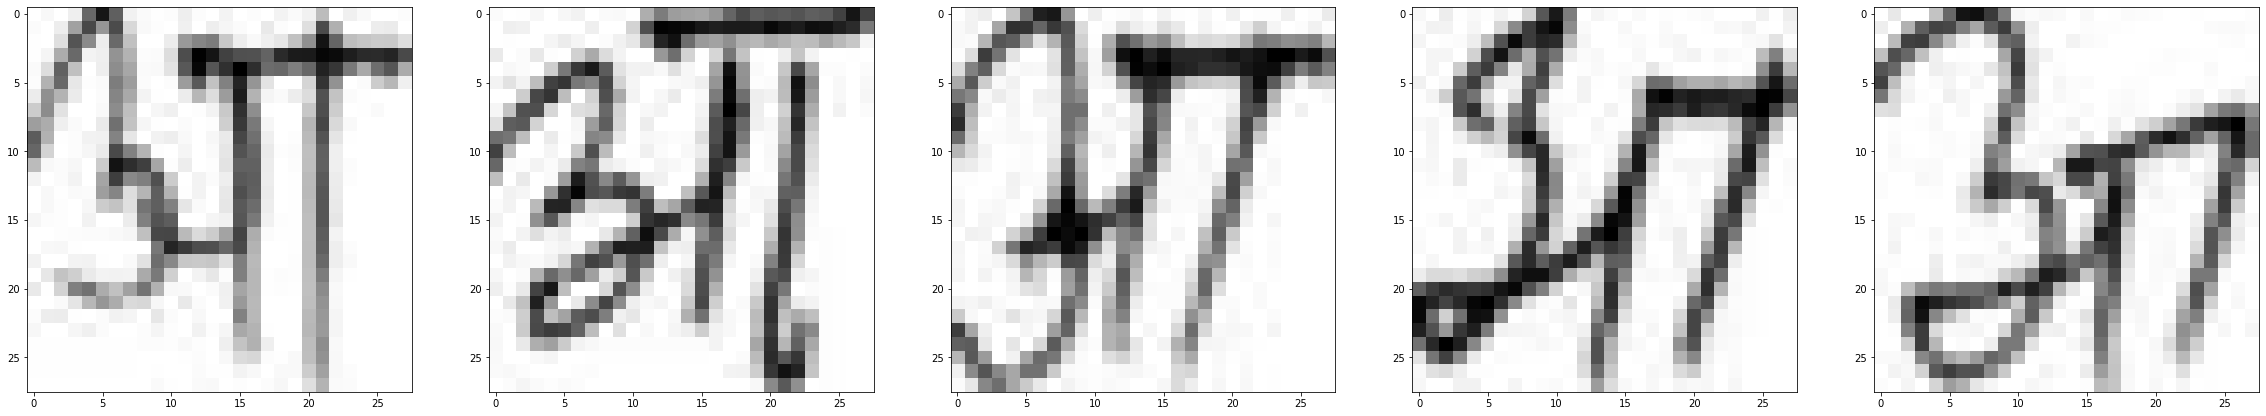

In [11]:
show_img(train_df)

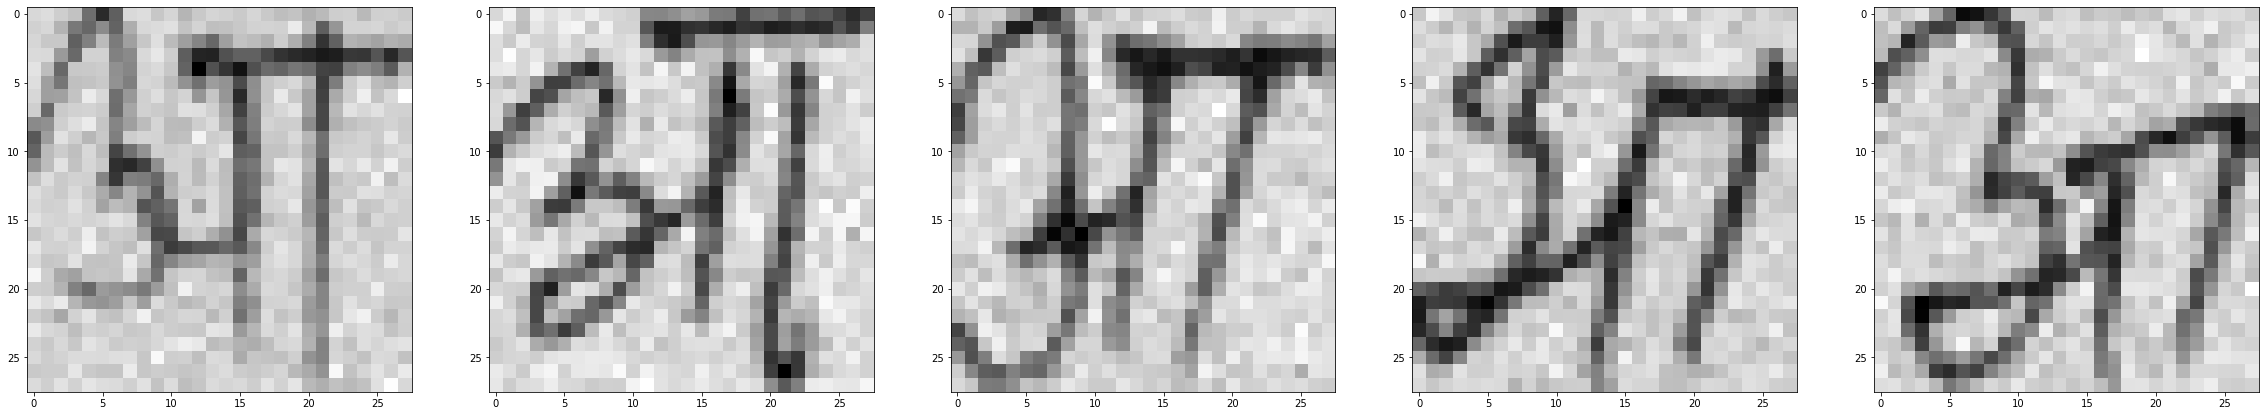

In [12]:
show_img(noised_df)

In [13]:
noised_df.shape

(221, 28, 28, 1)

In [20]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K

def autoencoder():
    
    input_img = Input(shape=(28,28,1), name='image_input')
    
    #enoder 
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
   # x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

In [21]:
model= autoencoder()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 28, 28, 1)]       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 28, 28, 64)        640       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 64)        0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 14, 14, 64)        36928     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 64)          0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 7, 7, 64)          36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 14, 14, 64)        0   

In [22]:
xnoised= noised_df[0:100]
xtest= noised_df[100:]

In [23]:
xnoised

array([[[[ 1.02570712],
         [ 0.98889104],
         [ 0.91398971],
         ...,
         [ 0.5240026 ],
         [ 0.17647214],
         [ 0.81196264]],

        [[ 0.99752925],
         [ 1.03777785],
         [ 1.08890422],
         ...,
         [ 0.30973213],
         [ 0.02985455],
         [ 0.74005338]],

        [[ 0.91430708],
         [ 0.94981841],
         [ 0.96542656],
         ...,
         [-0.03249875],
         [ 0.08150096],
         [ 0.50932155]],

        ...,

        [[ 0.92244   ],
         [ 0.27808228],
         [ 0.19351355],
         ...,
         [ 0.96884983],
         [ 1.04934322],
         [ 1.05197631]],

        [[ 0.81241041],
         [ 0.54468619],
         [ 0.23820269],
         ...,
         [ 1.08622347],
         [ 1.15595084],
         [ 0.99932384]],

        [[ 0.97919069],
         [ 0.85439098],
         [ 0.50413522],
         ...,
         [ 0.87098453],
         [ 1.04755944],
         [ 1.03156423]]],


       [[[ 0.98769459],


In [25]:
 model.fit(xnoised, xnoised, epochs=15, batch_size=10, validation_data=(xtest, xtest))

Epoch 1/15
10/10 [==============================] - 1s 57ms/step - loss: 0.2879 - val_loss: 0.2974
Epoch 2/15
10/10 [==============================] - 1s 54ms/step - loss: 0.2874 - val_loss: 0.2952
Epoch 3/15
10/10 [==============================] - 0s 51ms/step - loss: 0.2865 - val_loss: 0.2947
Epoch 4/15
10/10 [==============================] - 1s 57ms/step - loss: 0.2857 - val_loss: 0.2947
Epoch 5/15
10/10 [==============================] - 1s 52ms/step - loss: 0.2855 - val_loss: 0.2945
Epoch 6/15
10/10 [==============================] - 0s 52ms/step - loss: 0.2849 - val_loss: 0.2942
Epoch 7/15
10/10 [==============================] - 1s 55ms/step - loss: 0.2849 - val_loss: 0.2961
Epoch 8/15
10/10 [==============================] - 1s 63ms/step - loss: 0.2848 - val_loss: 0.2933
Epoch 9/15
10/10 [==============================] - 1s 53ms/step - loss: 0.2839 - val_loss: 0.2931
Epoch 10/15
10/10 [==============================] - 1s 54ms/step - loss: 0.2833 - val_loss: 0.2927
Epoch 11/

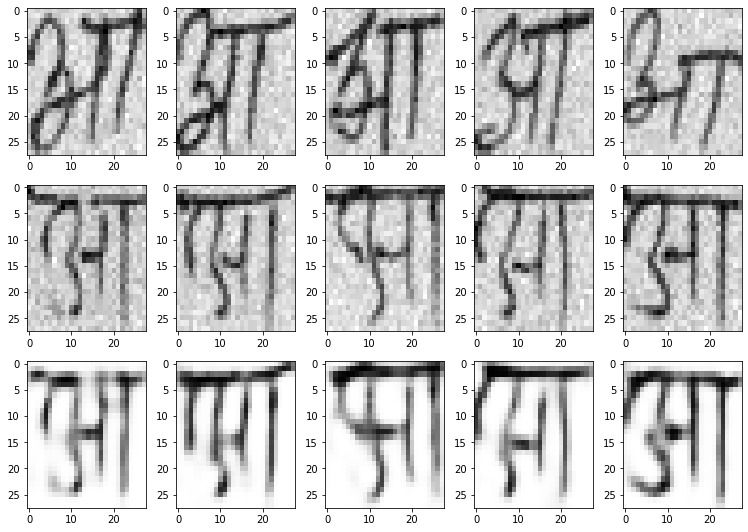

In [29]:
import cv2

pred= model.predict(xtest[:5])
def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(3, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xnoised[i], (28,28)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (28,28)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (28,28)), aspect='auto', cmap='gray')
       ## ax[3][i].imshow(cv2.medianBlur(xnoised[i], (5)), aspect='auto', cmap='gray')
       
    plt.tight_layout()
plot_predictions(xtest[:5], pred[:5])

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
IMG_WIDTH=28
IMG_HEIGHT=28
img_folder=r"D:\Education\College\sem 7\Deep Learning\vowels\image"

In [37]:
def create_dataset_PIL(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path))
            image= np.resize(image,(IMG_HEIGHT,IMG_WIDTH,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name
PIL_img_data, class_name=create_dataset_PIL(img_folder)

In [38]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]


In [39]:
model=tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Dense(80, activation='relu'),
            tf.keras.layers.Dense(100, activation='relu'),             
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(x=np.array(PIL_img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=10)

Epoch 1/10
28/28 [==============================] - 2s 7ms/step - loss: 4.6326 - accuracy: 0.1760
Epoch 2/10
28/28 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.0245
Epoch 3/10
28/28 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.0259
Epoch 4/10
28/28 [==============================] - 0s 6ms/step - loss: 1.7918 - accuracy: 0.0293
Epoch 5/10
28/28 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.0313: 0s - loss: 1.7918 - accuracy: 
Epoch 6/10
28/28 [==============================] - 0s 8ms/step - loss: 1.7918 - accuracy: 0.0284
Epoch 7/10
28/28 [==============================] - 0s 7ms/step - loss: 1.7918 - accuracy: 0.0307
Epoch 8/10
28/28 [==============================] - 0s 6ms/step - loss: 1.7918 - accuracy: 0.0245
Epoch 9/10
28/28 [==============================] - 0s 6ms/step - loss: 1.7918 - accuracy: 0.0256
Epoch 10/10
28/28 [==============================] - 0s 6ms/step - loss: 1.7918 - accu

In [42]:
import skimage

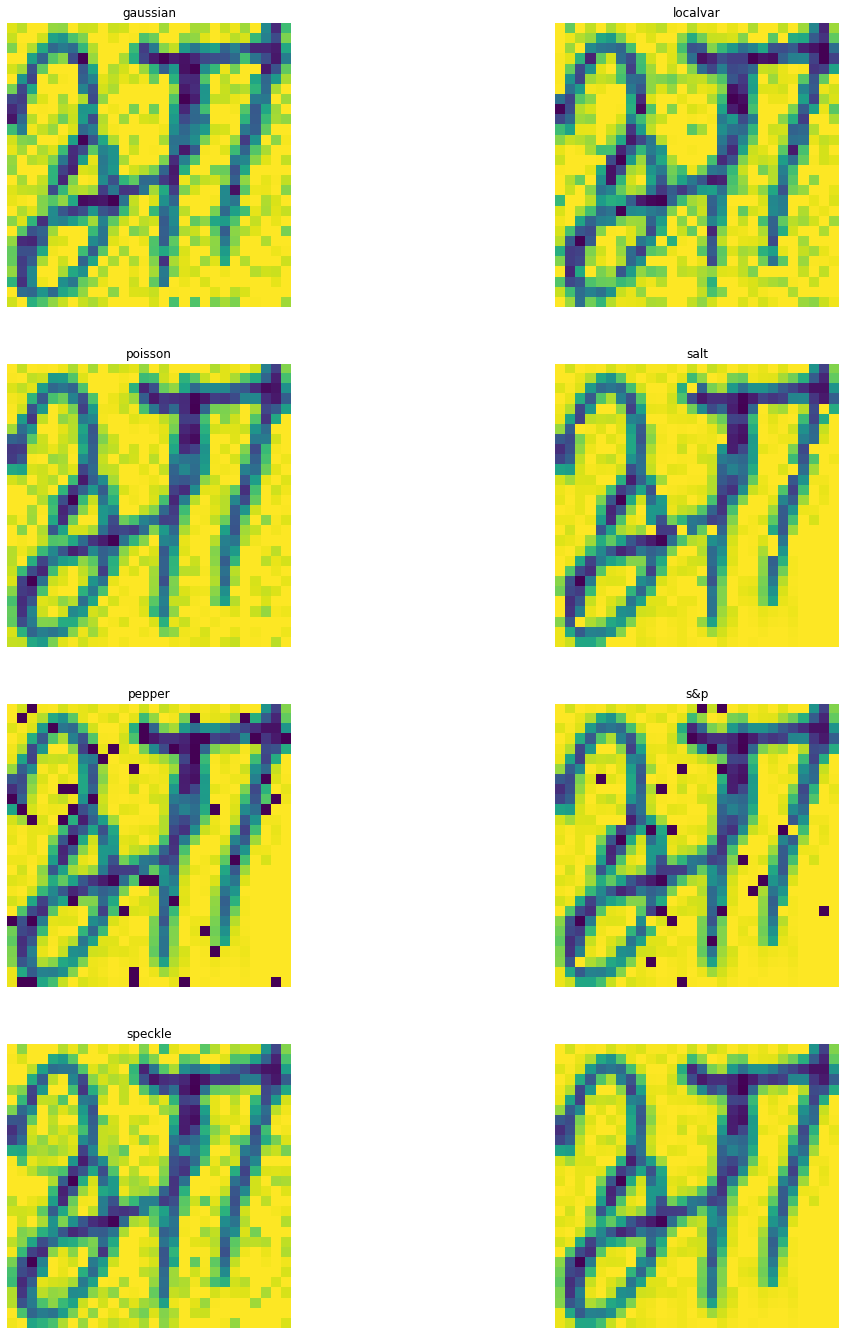

In [43]:
img_path=r"D:\\Education\\College\\sem 7\\Deep Learning\\vowels\\image\\2\\001_01.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

In [44]:
from keras import regularizers
encoding_dim = 32
input_img =keras.Input(shape=(784,))


In [45]:
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_3')>

In [46]:
encoder = keras.Model(input_img, encoded)
encoder

In [47]:
decoded = layers.Dense(784, activation='sigmoid')(encoded)

decoded

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_4')>

In [48]:
autoencoder = keras.Model(input_img, decoded)

In [49]:
# now we are creating a separate encoder model
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [50]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')